# Prima regressione simbolica sulla funzione $\mu(k,z)$

Questo notebook si serve dello script 'function.py' per estratte $\mu$ da CLASS per vari valori di masse del neutrino, poi crea un regressore e lo allena. \
Faccio variare le masse, z e k.

In [1]:
import os
import numpy as np
from pysr import *
from matplotlib import pyplot as plt
from importlib import reload
from classy import Class
import functions as f

In [2]:
reload(f)

<module 'functions' from '/Users/ste_cartu/Documents/Università/Tesi/Repository/functions.py'>

In [3]:
# attenzione! questa cella rimuove tutti i modelli di PySR dalla directory
'''
esecuzione = os.popen("rm hall_*")
output = esecuzione.read()
'''

'\nesecuzione = os.popen("rm hall_*")\noutput = esecuzione.read()\n'

In [4]:
nk = 50
nz = 10
filepath = 'files'
nmass = 5

# creo il file con le masse dei neutini
mass = f.Masses(0.06, 1, nmass, filepath)

In [5]:
# la prima volta che si esegue questo notebook bisoagna far partire questa cella, così si è sicuri che i file vengano generati da class correttamente
'''
masspath = os.path.join(filepath, 'neutrino_mass.npy')
mass = np.load(masspath)

cosmos = []
mus =  []
for i in range(nmass) :
    cosmos.append(f.DataFromCLASS(nk, nz, mass[i], filepath))
    mus.append(cosmos[i]['growth_ratio'])
'''

"\nmasspath = os.path.join(filepath, 'neutrino_mass.npy')\nmass = np.load(masspath)\n\ncosmos = []\nmus =  []\nfor i in range(nmass) :\n    cosmos.append(f.DataFromCLASS(nk, nz, mass[i], filepath))\n    mus.append(cosmos[i]['growth_ratio'])\n"

In [6]:
# se non è la prima volta che esegui questo notebook esegui questa cella, che carica i file già generati

mass = np.load('files/neutrino_mass.npy')
zz = np.load('files/redshift.npy')
kk = np.load('files/scale.npy')

mus = []
for m in mass :
    mupath = 'files/Mu(k,z)_m-neu=' + str(round(m, 3)) + '.npy'
    mus.append(np.load(mupath))
mus = np.array(mus)
print(mus.shape)

(5, 50, 10)


In [7]:
# confronto mus e muu
'''
plt.plot(zz, mus[0][0,:])
plt.plot(zz, muu[0][0,:], linestyle='-.')

plt.show()
'''

"\nplt.plot(zz, mus[0][0,:])\nplt.plot(zz, muu[0][0,:], linestyle='-.')\n\nplt.show()\n"

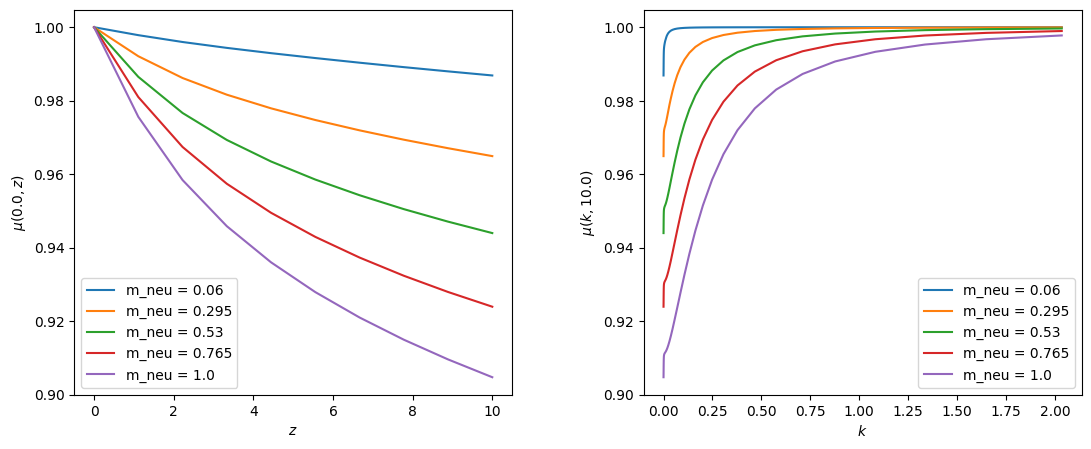

In [8]:
# plotto i mu per varie masse di neutrino in funzione di z e di k

fig, axs = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

for i in range(nmass) :
    string = 'm_neu = ' + str(round(mass[i], 3))
    axs[0].plot(zz, mus[i][0,:], label=string)

axs[0].set_xlabel('$z$')
axs[0].set_ylabel('$\mu( ' + str(round(kk[0], 3)) + ' ,z)$')
axs[0].legend()


for i in range(nmass) :
    string = 'm_neu = ' + str(round(mass[i], 3))
    axs[1].plot(kk, mus[i][:,-1], label=string)

axs[1].set_xlabel('$k$')
axs[1].set_ylabel('$\mu(k, ' + str(round(zz[-1], 3)) + ')$')
axs[1].legend()


plt.show()

# Regressione con un parametro

In [9]:
'''
model_muz = PySRRegressor(
    binary_operators = ["+", "-", "*", "/", "^"],
    unary_operators=["exp"],
    niterations=40,
    loss = "L2DistLoss()",
    model_selection = "best",
    equation_file = "models/model_muz.csv"
    )

model_muk = PySRRegressor(
    binary_operators = ["+", "-", "*", "/", "^"],
    unary_operators=["exp"],
    niterations=40,
    loss = "L2DistLoss()",
    model_selection = "best",
    equation_file = "models/model_muk.csv"
    )
'''

In [10]:
'''
sim_mu_z = []
eq_mu_z = []
sim_mu_k = []
eq_mu_k = []

zz = zz.reshape(nz,1)
kk = kk.reshape(nk,1)
'''

In [11]:
# alleno il regressore su mu(z) a k=10^-4
'''
for i in range(nmass) :
    model_muz.fit(zz, mus[i][0,:])
    sim_mu_z.append(model_muz.predict(zz))
    eq_mu_z.append(model_muz.sympy())
'''    

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 2.350e+05
Head worker occupation: 20.3%. This is high, and will prevent efficient resource usage. Increase `ncyclesperiteration` to reduce load on head worker.
Progress: 514 / 600 total iterations (85.667%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.689e-05  1.594e+01  y = 0.99271
3           4.067e-07  1.863e+00  y = (0.99859 ^ x₀)
5           2.826e-08  1.333e+00  y = (0.99771 ^ (x₀ ^ 0.75327))
7           2.154e-08  1.356e-01  y = (0.99771 ^ (x₀ ^ (0.74106 * 1.0331)))
9           1.466e-08  1.925e-01  y = (0.99771 ^ (x₀ ^ (0.74106 * (1.0331 ^ 0.74106))))
11          1.420e-08  1.578e-02  y = (0.99771 ^ (x₀ ^ (0.74106 * (1.0331 ^ (0.74106 ^ 0.74106))...
                                  )))
13          1.420e-08  2.895e-04  y = (0.99771 ^ (x₀ ^ (0.74106 * (1.0331 ^ (0.74106 * (1.0331 *...
                           

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 2.760e+05
Head worker occupation: 15.7%
Progress: 587 / 600 total iterations (97.833%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.555e-04  1.594e+01  y = 0.93941
3           1.218e-04  9.747e-01  y = (0.98833 ^ x₀)
5           6.653e-06  1.454e+00  y = ((x₀ + 0.9267) ^ -0.040444)
6           6.653e-06  5.263e-05  y = ((exp(-0.077772) + x₀) ^ -0.040446)
7           7.476e-07  2.186e+00  y = ((x₀ + (0.74063 ^ x₀)) ^ -0.042543)
8           4.068e-08  2.911e+00  y = ((x₀ + (exp(x₀) ^ -0.36848)) ^ -0.04323)
10          3.967e-08  1.245e-02  y = ((x₀ + (exp(x₀) ^ (-0.28621 + -0.091277))) ^ -0.043242)
12          3.926e-08  5.277e-03  y = ((x₀ + (exp((x₀ / 0.82787) * 0.89759) ^ -0.3423)) ^ -0.043...
                                  23)
14          3.911e-08  1.914e-03  y = ((x₀ + (exp(x₀) ^ ((-0.86014 - (2.1533 ^ -0.04323))

In [12]:
# alleno il regressore su mu(k) a z = 10
'''
for i in range(nmass) :
    model_muk.fit(kk, mus[i][:,-1])
    sim_mu_k.append(model_muk.predict(kk))
    eq_mu_k.append(model_muk.sympy())
'''

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 2.270e+05
Head worker occupation: 16.1%
Progress: 504 / 600 total iterations (84.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.361e-05  1.594e+01  y = 0.99533
2           2.361e-05  5.960e-08  y = exp(-0.0046802)
3           3.753e-06  1.839e+00  y = (x₀ ^ 0.0012082)
5           2.394e-06  2.248e-01  y = ((x₀ / 0.27971) ^ 0.0014796)
6           2.303e-06  3.862e-02  y = (x₀ ^ (0.0012082 ^ exp(x₀)))
7           2.006e-06  1.381e-01  y = ((x₀ / (0.2435 + x₀)) ^ 0.0014796)
8           1.682e-06  1.764e-01  y = (x₀ ^ (0.0012082 ^ exp(x₀ ^ 0.77602)))
9           1.241e-06  3.039e-01  y = (x₀ ^ (0.0012082 ^ exp(exp(1.987) * x₀)))
10          1.031e-06  1.857e-01  y = (x₀ ^ (0.0014796 ^ exp(exp(exp(0.54649)) * x₀)))
11          8.981e-07  1.377e-01  y = ((x₀ ^ -0.0017829) ^ ((x₀ ^ 0.18366) - (x₀ ^ x₀)))
12          5.445e

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 2.280e+05
Head worker occupation: 14.4%
Progress: 478 / 600 total iterations (79.667%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.679e-04  1.594e+01  y = 0.97985
3           1.281e-05  1.287e+00  y = (x₀ ^ 0.0044761)
5           8.166e-06  2.249e-01  y = ((0.0045184 + x₀) ^ 0.0064304)
7           6.102e-06  1.457e-01  y = ((0.0028425 + (x₀ ^ 0.77083)) ^ 0.0065689)
8           2.674e-06  8.250e-01  y = ((0.0065689 + x₀) ^ (0.0065689 ^ exp(x₀)))
10          2.462e-06  4.134e-02  y = ((0.0065689 + (x₀ / 1.0622)) ^ (0.0065689 ^ exp(x₀)))
11          2.244e-06  9.273e-02  y = (((x₀ ^ exp(x₀)) + 0.0065689) ^ (0.0065689 ^ exp(x₀)))
12          2.137e-06  4.868e-02  y = ((0.0065689 + x₀) ^ (0.0065689 ^ (exp(x₀ * -0.25824) + x₀)...
                                  ))
13          1.801e-06  1.710e-01  y = (0.90738 ^ (exp((-1.3

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 2.000e+05
Head worker occupation: 9.8%
Progress: 383 / 600 total iterations (63.833%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           3.987e-04  1.594e+01  y = 0.96309
3           8.637e-05  7.648e-01  y = (x₀ ^ 0.0078523)
5           3.834e-06  1.557e+00  y = (0.94632 ^ (0.00077744 ^ x₀))
7           2.350e-06  2.449e-01  y = (0.94632 ^ ((0.010906 * x₀) ^ x₀))
9           2.350e-06  1.141e-05  y = (0.94632 ^ (((0.073658 * 0.14744) * x₀) ^ x₀))
12          2.349e-06  2.674e-05  y = (0.94632 ^ (((0.010906 * (exp(x₀) ^ 0.010906)) * x₀) ^ x₀)...
                                  )
13          1.719e-06  3.123e-01  y = exp((-0.046069 / exp(x₀ + (x₀ / 0.25393))) * (x₀ ^ -0.0256...
                                  23))
15          1.414e-06  9.765e-02  y = exp((-0.046069 / exp(x₀ + (x₀ / 0.25393))) * ((x₀ + x₀) ^ ...
            

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 1.460e+05
Head worker occupation: 7.9%
Progress: 278 / 600 total iterations (46.333%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.723e-04  1.594e+01  y = 0.9461
3           2.521e-04  4.905e-01  y = (x₀ ^ 0.01119)
5           5.259e-05  7.836e-01  y = ((0.0060858 + x₀) ^ 0.015944)
6           3.339e-06  2.757e+00  y = (exp(0.014809 ^ x₀) ^ -0.075941)
11          2.950e-06  2.480e-02  y = (exp((0.013612 * exp(x₀)) ^ x₀) ^ (-0.06729 * 1.1271))
13          2.777e-06  3.022e-02  y = (exp(exp(-1.506 - ((x₀ * (3.4354 - x₀)) + x₀))) ^ -0.34196...
                                  )
15          2.770e-06  1.334e-03  y = (exp((0.013612 * exp(x₀)) ^ x₀) ^ (-0.06729 * (1.1271 ^ (0...
                                  .34214 ^ x₀))))
17          2.747e-06  4.044e-03  y = (exp(exp(-1.506 - ((x₀ * (3.4354 - ((1.1674 ^ 0.56461) * x..

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 1.700e+05
Head worker occupation: 7.0%
Progress: 305 / 600 total iterations (50.833%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           9.606e-04  1.594e+01  y = 0.92917
5           3.752e-06  1.386e+00  y = (0.90738 ^ (0.04309 ^ x₀))
7           3.678e-06  9.966e-03  y = (0.90738 ^ ((0.041637 ^ x₀) + 0.0067458))
8           3.328e-06  9.982e-02  y = (0.90738 ^ ((0.028717 * exp(x₀)) ^ x₀))
9           3.096e-06  7.222e-02  y = (0.90738 ^ ((0.056382 * (x₀ ^ x₀)) ^ x₀))
10          2.990e-06  3.482e-02  y = (0.90738 ^ (((exp(x₀) - x₀) * 0.041637) ^ x₀))
11          2.783e-06  7.192e-02  y = (0.90738 ^ (((0.035446 * (x₀ * x₀)) - -0.036358) ^ x₀))
17          2.571e-06  1.322e-02  y = (0.90738 ^ ((0.33456 ^ 0.80812) ^ (((((0.80812 / x₀) ^ x₀)...
                                   - -1.3801) * x₀) / 0.73391)))
19          2.561e-06

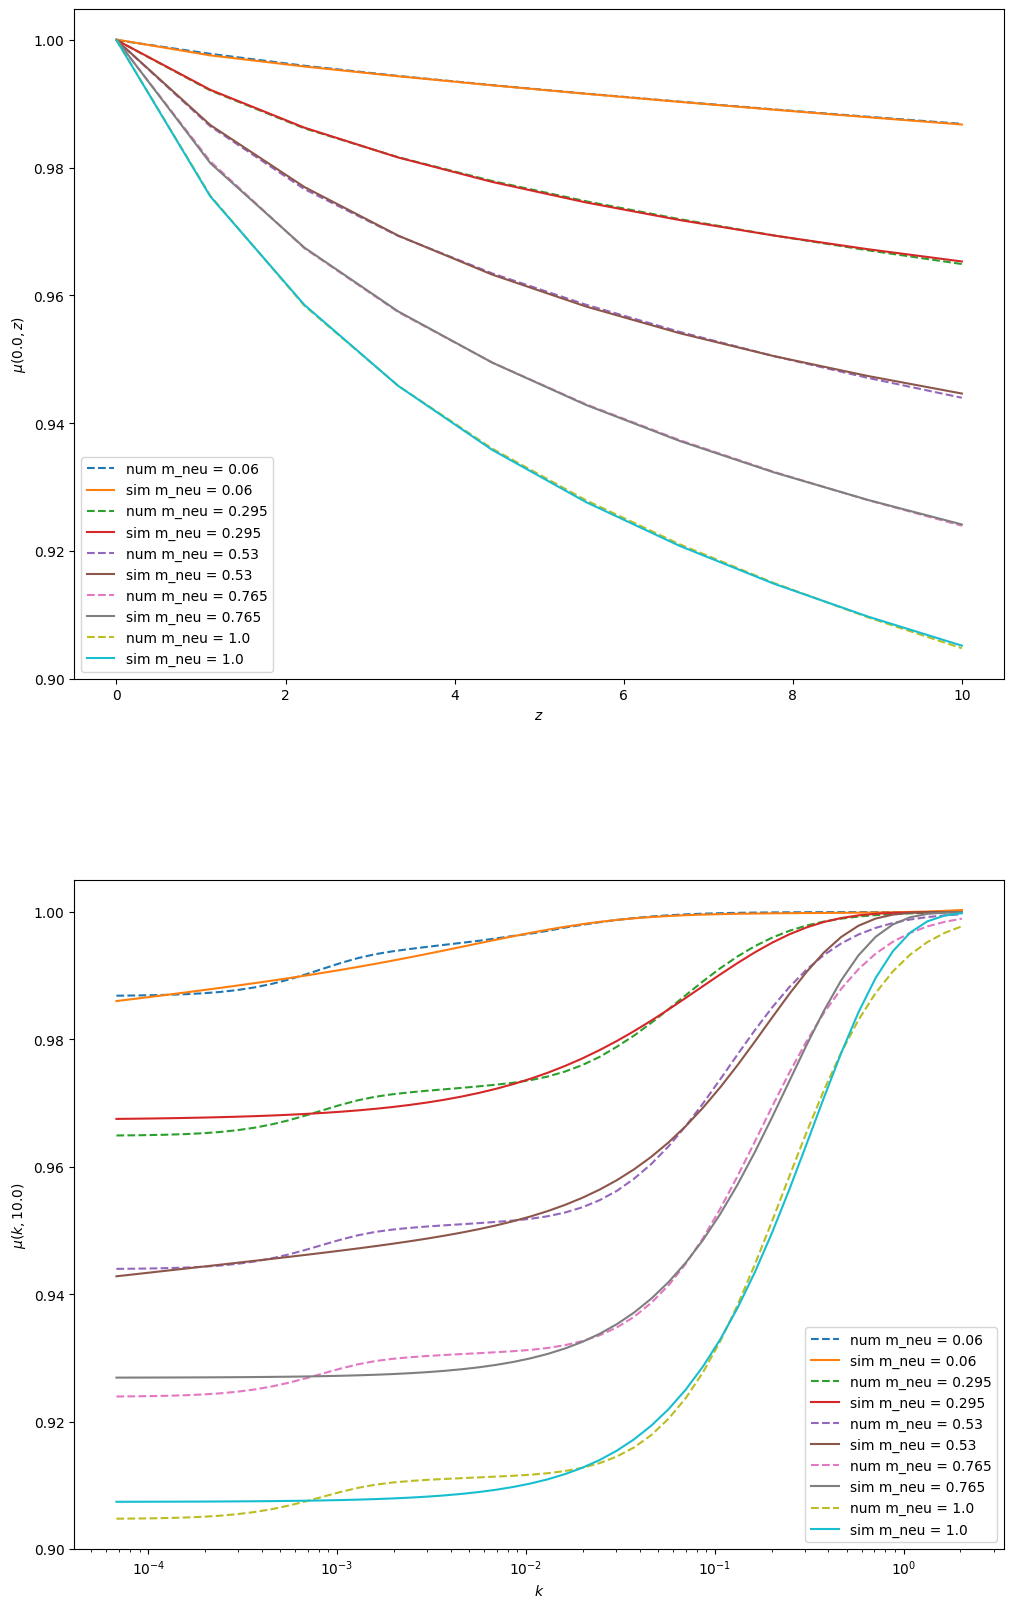

In [13]:
# plotto i mu simulati per varie masse di neutrino in funzione di z e di k
'''
fig, axs = plt.subplots(2, 1, figsize=(12, 20), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

for i in range(nmass) :
    title1 = 'num m_neu = ' + str(round(mass[i], 3))
    axs[0].plot(zz, mus[i][0,:], label=title1, linestyle='--')
    title2 = 'sim m_neu = ' + str(round(mass[i], 3))
    axs[0].plot(zz, sim_mu_z[i], label=title2)

axs[0].set_xlabel('$z$')
axs[0].set_ylabel('$\mu( ' + str(round(kk[0,0], 3)) + ' ,z)$')
axs[0].legend()


for i in range(nmass) :
    title1 = 'num m_neu = ' + str(round(mass[i], 3))
    axs[1].semilogx(kk, mus[i][:,-1], label=title1, linestyle='--')
    title2 = 'sim m_neu = ' + str(round(mass[i], 3))
    axs[1].semilogx(kk, sim_mu_k[i], label=title2)

axs[1].set_xlabel('$k$')
axs[1].set_ylabel('$\mu(k, ' + str(round(zz[-1,0], 3)) + ')$')
axs[1].legend()


plt.show()
'''

# Regressione con più parametri

In [14]:
model_mu = PySRRegressor(
    binary_operators = ["+", "-", "*", "/", "^"],
    unary_operators=["exp", "log"],
    niterations=40,
    loss = "L2DistLoss()",
    model_selection = "best",
    equation_file = "models/model1_mu.csv"
    )

In [15]:
# tentaivo fallito
'''
# uso meshgrid per creare tutte le combinazioni di masse, redshift e scale

grid_mass, grid_kk, grid_zz = np.meshgrid(mass, kk, zz)
data = np.column_stack((grid_mass.ravel(), grid_kk.ravel(), grid_zz.ravel()))

#print(data.shape)
for i in range(nmass*nk*nz) :
    print(data[i,0], '\t', data[i,1], '\t', data[i,2], '\t')
'''

"\n# uso meshgrid per creare tutte le combinazioni di masse, redshift e scale\n\ngrid_mass, grid_kk, grid_zz = np.meshgrid(mass, kk, zz)\ndata = np.column_stack((grid_mass.ravel(), grid_kk.ravel(), grid_zz.ravel()))\n\n#print(data.shape)\nfor i in range(nmass*nk*nz) :\n    print(data[i,0], '\t', data[i,1], '\t', data[i,2], '\t')\n"

In [16]:
# creazione dei dati su cui allenare il modello, chiedere a Marco se è più efficiente così o salvare tutto su un dataframe come fa Crown

# controllino
if (len(mus[:,0,0]) != nmass) :
    print('Error! dim(Mu[:,0,0]) ≠ dim(mass)')
elif (len(mus[0,:,0]) != nk) :
    print('Error! dim(Mu[0,:,0]) ≠ dim(scale)')
elif (len(mus[0,0,:]) != nz) :
    print('Error! dim(Mu[0,:,0]) ≠ dim(redshift)')

data = np.zeros([nmass*nk*nz, 4])
for m in range(nmass) :
    for k in range(nk) :
        for z in range(nz) :
            data[m+k+z,0] = mass[m]
            data[m+k+z,1] = kk[k]
            data[m+k+z,2] = zz[z]
            data[m+k+z,3] = mus[m,k,z]

            #print(data[m+k+z,0], '\t', data[m+k+z,1], '\t', data[m+k+z,2], '\t', data[m+k+z,3])

# l'array 'data' è così strutturato:
# masse neutrino | k (scala) | redshift | valore di mu

/var/folders/ll/brfzdrlx3nndb4spv5812khr0000gn/T/ipykernel_23899/4071466419.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[m+k+z,1] = kk[k]
/var/folders/ll/brfzdrlx3nndb4spv5812khr0000gn/T/ipykernel_23899/4071466419.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[m+k+z,2] = zz[z]


In [17]:
# alleno il modello

model_mu.fit(data[:,:2], data[:,3])

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 4.280e+04
Head worker occupation: 3.6%
Progress: 81 / 600 total iterations (13.500%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.627e-04  1.594e+01  y = x₀
3           9.164e-08  4.443e+00  y = (x₀ ^ 0.0044618)
4           1.382e-08  1.892e+00  y = (x₀ ^ exp(-24.566))
7           1.221e-08  4.123e-02  y = (((x₀ * 0.24101) ^ 0.039379) ^ 0.0044618)
9           4.098e-09  5.458e-01  y = (((x₀ / exp(exp(x₁))) ^ 0.012934) ^ 0.012934)
11          3.015e-09  1.534e-01  y = ((((x₁ * x₀) ^ 0.0044618) ^ (0.0044618 - x₁)) ^ 0.21039)
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 4.600e+04
Head worker occupation: 3.2%
Progress: 164 / 600 total iterations (27.333%)
Hall of Fame:
---------------

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                                 x0   
	1        5.388938                                (x0 ^ 2.9710402e-5)   
	2        0.000252                             (x0 ^ exp(-24.565517))   
	3        0.143881               ((2.9710402e-5 * x0) ^ 2.9710402e-5)   
	4        0.795155                    ((x0 / exp(x1)) ^ 0.0006413304)   
	5        0.364689          ((x0 * (8.227459e-5 ^ x1)) ^ 8.227459e-5)   
	6        0.133759  ((x1 ^ (0.0006413304 - x1)) ^ (0.0006413304 / ...   
	7  >>>>  0.169824  ((x0 / (1.5023319 ^ exp(x1 * x1))) ^ 8.227459e-5)   
	8        0.109867  ((x0 / (1.0857515 ^ (exp(x1 / 0.41596732) * x1...   
	9        0.080227  ((x1 + x0) ^ (8.227459e-5 / ((log(1.8667058) -...   
	
	           loss  complexity  
	0  6.627139e-04           1  
	1  1.382147e-08           3  
	2  1.381799e-08           4  
	3  1.196625e-08           5  
	4  5.402896e-09           6  
	5  3.751841e-09           7  
	6  2.871194e-09           9  
	7  2.422752e-09          10  
	8  1.944822e-09          12  
	9  1.794889e-09          13  
]

In [18]:
pred = model_mu.predict(data[:,:2])

#[print(p) for p in pred]

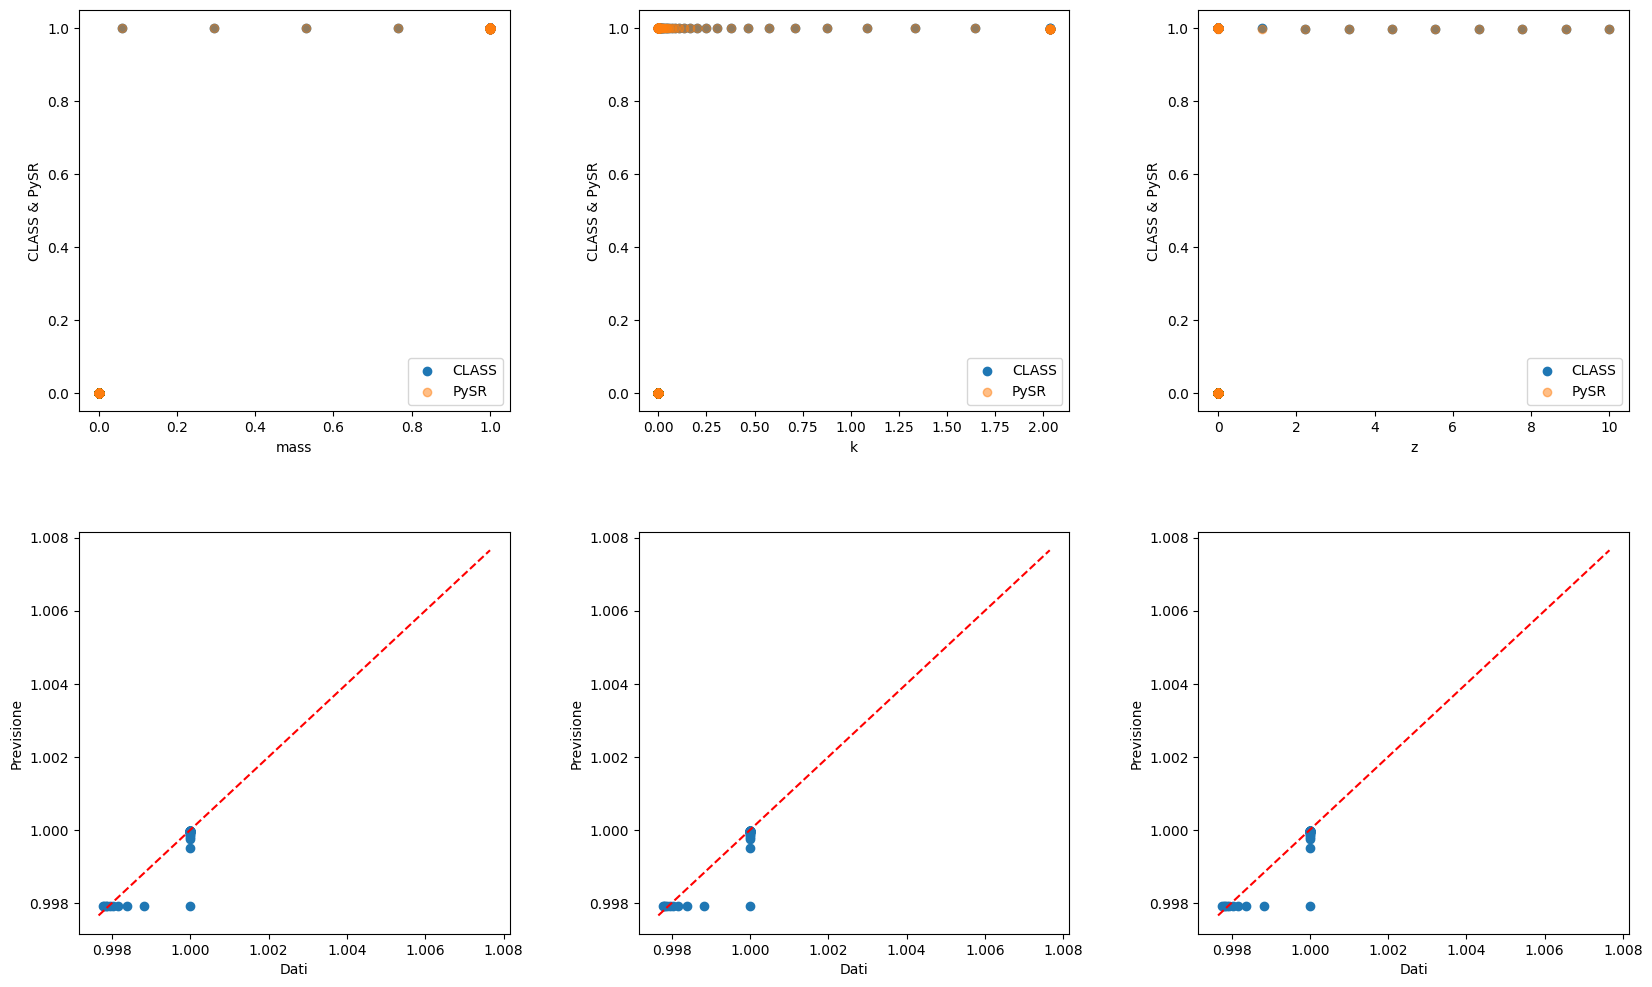

In [19]:
# plotto le predizioni di PySR contro i dati di CLASS

fig, axs = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

# x: masse del neutrino
axs[0,0].scatter(data[:,0], data[:,3], label='CLASS')
axs[0,0].scatter(data[:,0], pred[:], alpha=0.5, label='PySR')
axs[0,0].set_xlabel('mass')
axs[0,0].set_ylabel('CLASS & PySR')
axs[0,0].legend()

# x: scala
axs[0,1].scatter(data[:,1], data[:,3], label='CLASS')
axs[0,1].scatter(data[:,1], pred[:], alpha=0.5, label='PySR')
axs[0,1].set_xlabel('k')
axs[0,1].set_ylabel('CLASS & PySR')
axs[0,1].legend()

# x: redshift
axs[0,2].scatter(data[:,2], data[:,3], label='CLASS')
axs[0,2].scatter(data[:,2], pred[:], alpha=0.5, label='PySR')
axs[0,2].set_xlabel('z')
axs[0,2].set_ylabel('CLASS & PySR')
axs[0,2].legend()

for i in range(3) :
    axs[1,i].plot(data[:63,3], pred[:63], 'o')
    xlim = axs[1,i].get_xlim()
    t = np.arange(xlim[0], xlim[1]+0.01, 0.01)
    axs[1,i].plot(t, t, linestyle='--', color='red')
    axs[1,i].set_xlabel('Dati')
    axs[1,i].set_ylabel('Previsione')

plt.show();

In [20]:
np.save('data1', data)
np.save('pred1', pred)